# COVID-19 World Vaccination Progress

## Daily and Total Vaccination for COVID-19 in the World

## Context
Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded.

## Acknowledgements
I would like to specify that I am only making available Our World in Data collected data about vaccinations to Kagglers. My contribution is very small, just daily collection, merge and upload of the updated version, as maintained by Our World in Data in their GitHub repository.

The dataset is prepared by Gabriel Preda

Here is the dataset link : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of Some Columns which I used in Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Filling missing ISO Code for countries which is part of United Kingdom</a></li>
      <li><a href="#part3-2">3.2 Formatting date column as day-month-year </a></li>
      <li><a href="#part3-3">3.3 Filling empty cells with with previous row value</a></li>
      <li><a href="#part3-3">3.4 Replacing Pifzer/BioNTech to Pfizer/BioNTech</a></li>
      <li><a href="#part3-3">3.5 3.5 Replacing England,Wales,Northern Ireland and Scotland and  to United Kingdom</a></li>  
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Showing which vaccination scheme is used most</a></li>
      <li><a href="#part4-2">4.2 Showing which country has vaccinated the most people against COVID-19</a></li>  
      <li><a href="#part4-3">4.3 Showing which countries use different kinds of vaccine's name in total vacination count</a></li>   
      <li><a href="#part4-4">4.4 Total vaccinations per country, grouped by vaccine scheme</a></li>   
      <li><a href="#part4-5">4.5 Total vs Total vaccinations per hundred grouped by Vaccines</a></li>   
      <li><a href="#part4-6">4.6 Timeline for No of people Vaccinated by Country</a></li>     
      <li><a href="#part4-7">4.7 WordCloud</a></li>   
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg 
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [53]:
file_location_url = "files/country_vaccinations.csv";

covid19_vaccinations_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [54]:
row_count = covid19_vaccinations_df.shape[0]
column_count = covid19_vaccinations_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 1587 , Column : 15


4 - Show first 5 values of dataframe

In [55]:
covid19_vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


5 - Show last 5 values of dataframe

In [56]:
covid19_vaccinations_df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1582,Wales,NaN,2021-01-21,212732.0,212317.0,415.0,21901.0,12318.0,6.75,6.73,0.01,3907.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1583,Wales,NaN,2021-01-22,241016.0,240547.0,469.0,28284.0,15148.0,7.64,7.63,0.01,4804.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1584,Wales,NaN,2021-01-23,265054.0,264538.0,516.0,24038.0,17371.0,8.41,8.39,0.02,5510.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1585,Wales,NaN,2021-01-24,271376.0,270833.0,543.0,6322.0,17063.0,8.61,8.59,0.02,5412.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1586,Wales,NaN,2021-01-25,290147.0,289566.0,581.0,18771.0,18279.0,9.20,9.18,0.02,5798.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


6 - Show each column information of dataframe

In [57]:
covid19_vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1587 non-null   object 
 1   iso_code                             1409 non-null   object 
 2   date                                 1587 non-null   object 
 3   total_vaccinations                   1052 non-null   float64
 4   people_vaccinated                    1000 non-null   float64
 5   people_fully_vaccinated              334 non-null    float64
 6   daily_vaccinations_raw               846 non-null    float64
 7   daily_vaccinations                   1525 non-null   float64
 8   total_vaccinations_per_hundred       1052 non-null   float64
 9   people_vaccinated_per_hundred        1000 non-null   float64
 10  people_fully_vaccinated_per_hundred  334 non-null    float64
 11  daily_vaccinations_per_million

7 - Show how many variables there are in dataframe

In [58]:
covid19_vaccinations_df.count()

country                                1587
iso_code                               1409
date                                   1587
total_vaccinations                     1052
people_vaccinated                      1000
people_fully_vaccinated                 334
daily_vaccinations_raw                  846
daily_vaccinations                     1525
total_vaccinations_per_hundred         1052
people_vaccinated_per_hundred          1000
people_fully_vaccinated_per_hundred     334
daily_vaccinations_per_million         1525
vaccines                               1587
source_name                            1587
source_website                         1587
dtype: int64

8 - Show descriptive statistics of dataframe

In [59]:
covid19_vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.052000e+03,1.000000e+03,3.340000e+02,8.460000e+02,1.525000e+03,1052.000000,1000.000000,334.000000,1525.000000
mean,6.816659e+05,6.426651e+05,1.715269e+05,5.117685e+04,4.322459e+04,2.809021,2.661860,0.658952,1584.196721
std,2.165897e+06,1.938581e+06,4.772281e+05,1.399615e+05,1.175745e+05,5.780718,5.115721,1.876430,3310.815076
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.775200e+04,1.813350e+04,1.952750e+03,1.818000e+03,1.659000e+03,0.267500,0.270000,0.020000,273.000000
50%,7.779700e+04,7.961300e+04,8.468500e+03,8.129000e+03,5.654000e+03,0.930000,0.940000,0.075000,684.000000
75%,3.511120e+05,3.885522e+05,8.605525e+04,4.013875e+04,2.585300e+04,2.160000,2.130000,0.650000,1169.000000
max,2.354099e+07,1.990224e+07,3.481921e+06,1.561585e+06,1.126251e+06,47.900000,31.980000,15.920000,30869.000000


9 - Determine if null values of each column are in a dataframe

In [60]:
covid19_vaccinations_df.isnull().sum()

country                                   0
iso_code                                178
date                                      0
total_vaccinations                      535
people_vaccinated                       587
people_fully_vaccinated                1253
daily_vaccinations_raw                  741
daily_vaccinations                       62
total_vaccinations_per_hundred          535
people_vaccinated_per_hundred           587
people_fully_vaccinated_per_hundred    1253
daily_vaccinations_per_million           62
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

<a id='part2'></a>
## 2. Description of Some Columns which I used in Dataframe

In [61]:
values = [
  ['country', 
   'iso_code', 
   'date',
   'total_vaccinations',
   'people_vaccinated',
   'people_fully_vaccinated',
   'daily_vaccinations_raw',
   'daily_vaccinations',
   'total_vaccinations_per_hundred',
   'people_vaccinated_per_hundred',
   'people_fully_vaccinated_per_hundred',
   'daily_vaccinations_per_million',
   'vaccines',
   'source_name ',
   'source_website',
  ],  #1st col
  ["A name of country", 
   "An ISO code for the country",
   "A date for implementing vaccination",  
   "A total number of vaccination in current date",
   "A total number of people vaccinations",
   "A total complete vaccinations (with rapel)",
   "A daily vaccinations (raw)",
   "A daily vaccinations",
   "A total vaccination percent",
   "A people vaccinated percent",
   "A people fully vaccinated percent",
   "A daily vaccination per million population",
   "A vaccines names",
   "A data source name",
   "A data source website name",
  ] #2nd col
] 

layout = go.Layout(title="Description of Columns which I used in Dataframe", 
                   height=720, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [350,700],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='firebrick',
    fill_color='darkred',
    align=['center','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['red', 'tomato']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Filling missing ISO Code for countries which is part of United Kingdom

In [62]:
covid19_vaccinations_df[covid19_vaccinations_df['iso_code'].isnull()]['country'].value_counts()

Scotland            44
Northern Ireland    44
Wales               44
England             37
Northern Cyprus      9
Name: country, dtype: int64

In [63]:
covid19_vaccinations_df['iso_code'].fillna('GBR', inplace=True)

<a id='part3-2'></a>
### 3.2 Formatting date column as day-month-year

In [64]:
covid19_vaccinations_df['date'] = pd.to_datetime(covid19_vaccinations_df['date'])
covid19_vaccinations_df['date'] = covid19_vaccinations_df['date'].dt.strftime('%d-%m-%Y')

<a id='part3-3'></a>
### 3.3 Filling empty cells with with previous row value

In [65]:
covid19_vaccinations_df.fillna(method='ffill', inplace=True)

<a id='part3-4'></a>
### 3.4 Replacing Pifzer/BioNTech to Pfizer/BioNTech

In [66]:
covid19_vaccinations_df['vaccines'] = covid19_vaccinations_df['vaccines'].replace(['Pifzer/BioNTech'],'Pfizer/BioNTech')
covid19_vaccinations_df['vaccines'] = covid19_vaccinations_df['vaccines'].replace(['Pfizer/BioNTech, Pifzer/BioNTech'],'Pfizer/BioNTech')

<a id='part3-5'></a>
### 3.5 Replacing England,Wales,Northern Ireland and Scotland and  to United Kingdom

In [67]:
covid19_vaccinations_df['country'] = covid19_vaccinations_df['country'].replace(["England","Wales","Northern Ireland","Scotland"],'United Kingdom')

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Showing which vaccination scheme is used most

In [68]:
covid19_vaccinations_df_vaccine = covid19_vaccinations_df.groupby(['vaccines'])['total_vaccinations'].sum().reset_index()
covid19_vaccinations_df_vaccine = covid19_vaccinations_df_vaccine.sort_values(['total_vaccinations'], ascending = False)
covid19_vaccinations_df_vaccine.reset_index(drop=True, inplace=True)
covid19_vaccinations_df_vaccine

,vaccines,total_vaccinations
0,"Moderna, Pfizer/BioNTech",444629339.0
1,"Oxford/AstraZeneca, Pfizer/BioNTech",196862418.0
2,"CNBG, Sinovac",185500000.0
3,Pfizer/BioNTech,80769478.0
4,"Pfizer/BioNTech, Sinopharm",39650538.0
5,Sinovac,16558533.0
6,Sputnik V,14706131.0
7,"Covaxin, Covishield",12035970.0
8,"Pfizer/BioNTech, Sinopharm, Sputnik V",1357112.0
9,Sinopharm,139787.0


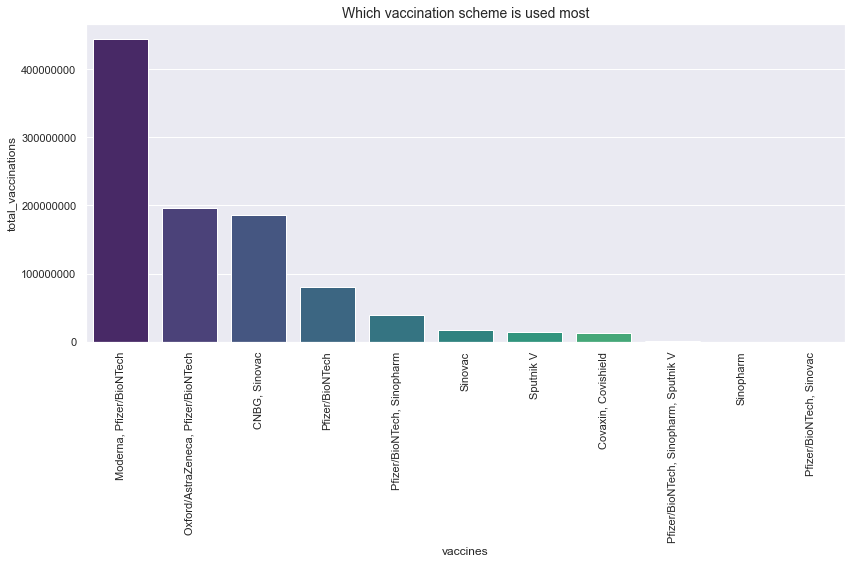

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(data = covid19_vaccinations_df_vaccine, x= 'vaccines' , y = 'total_vaccinations', palette='viridis')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Which vaccination scheme is used most", fontsize = 14)
plt.tight_layout()
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Showing which country has vaccinated the most people against COVID-19

In [70]:
covid19_vaccinations_df_country = covid19_vaccinations_df.groupby(['country'])['total_vaccinations'].sum().reset_index()
covid19_vaccinations_df_country = covid19_vaccinations_df_country.sort_values(['total_vaccinations'], ascending = False)
covid19_vaccinations_df_country.reset_index(drop=True, inplace=True)
covid19_vaccinations_df_country

,country,total_vaccinations
0,United States,316885603.0
1,United Kingdom,196862418.0
2,China,185500000.0
3,Israel,65596935.0
4,United Arab Emirates,37247322.0
5,Germany,24332685.0
6,Italy,22305123.0
7,Spain,15881211.0
8,Turkey,12622030.0
9,Canada,12591453.0


In [71]:
fig = px.choropleth(covid19_vaccinations_df_country, 
                    locations="country", 
                    locationmode='country names', 
                    color="total_vaccinations", 
                    hover_name="country", 
                    color_continuous_scale="YlOrRd",                    
                    title='Which country has vaccinated the most people against COVID-19')

fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
plt.tight_layout()
pio.write_image(fig, "images/image3.png") 
fig.show()

<Figure size 432x288 with 0 Axes>

<a id='part4-3'></a>
### 4.3 Showing which countries use different kinds of vaccine's name in total vacination count

In [72]:
covid19_vaccinations_df_country_vaccine_type = covid19_vaccinations_df.groupby(['country','vaccines'])['total_vaccinations'].sum() \
                                               .reset_index() \
                                               .sort_values(['total_vaccinations'], ascending = False)

covid19_vaccinations_df_country_vaccine_type.reset_index(drop=True, inplace=True)

In [73]:
covid19_vaccinations_df_country_vaccine_type

,country,vaccines,total_vaccinations
0,United States,"Moderna, Pfizer/BioNTech",316885603.0
1,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",196862418.0
2,China,"CNBG, Sinovac",185500000.0
3,Israel,"Moderna, Pfizer/BioNTech",65596935.0
4,United Arab Emirates,"Pfizer/BioNTech, Sinopharm",37247322.0
5,Germany,"Moderna, Pfizer/BioNTech",24332685.0
6,Italy,Pfizer/BioNTech,22305123.0
7,Spain,"Moderna, Pfizer/BioNTech",15881211.0
8,Turkey,Sinovac,12622030.0
9,Canada,"Moderna, Pfizer/BioNTech",12591453.0


In [74]:
fig = px.bar(covid19_vaccinations_df_country_vaccine_type, 
             x='vaccines', 
             y='total_vaccinations', 
             color ='country',
             title="Which countries use different kinds of vaccine's name in total vacination count",
             color_discrete_sequence=px.colors.qualitative.Alphabet,
             height = 650,
             width = 1000
            )
fig.update_layout(xaxis_categoryorder = 'total descending')
pio.write_image(fig, "images/image4.png") 
fig.show()

<a id='part4-4'></a>
### 4.4 Total vaccinations per country, grouped by vaccine scheme

In [75]:
fig = px.treemap(covid19_vaccinations_df, path = ['vaccines', 'country'], values = 'total_vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
pio.write_image(fig, "images/image5.png") 
fig.show()

<a id='part4-5'></a>
### 4.5 Total vs Total vaccinations per hundred grouped by Vaccines

In [76]:
covid19_vaccinations_df_group = covid19_vaccinations_df.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                                           'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           "people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million'].max().reset_index()

C:\Users\Noyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [77]:
fig = px.scatter(covid19_vaccinations_df_group,
                 x = 'total_vaccinations',
                 y='people_vaccinated_per_hundred',
                 color='vaccines',
                 size='total_vaccinations',
                 hover_name = 'country',
                 size_max = 50,
                 title="Total vaccinations vs People vaccinated per hundred")
pio.write_image(fig, "images/image6.png") 
fig.show()

<a id='part4-6'></a>
### 4.6 Timeline for No of people Vaccinated by Country

In [78]:
d = pd.date_range('13-12-2020', '26-01-2021', freq='D').strftime('%d-%m-%Y')   
d

Index(['13-12-2020', '14-12-2020', '15-12-2020', '16-12-2020', '17-12-2020',
       '18-12-2020', '19-12-2020', '20-12-2020', '21-12-2020', '22-12-2020',
       '23-12-2020', '24-12-2020', '25-12-2020', '26-12-2020', '27-12-2020',
       '28-12-2020', '29-12-2020', '30-12-2020', '31-12-2020', '01-01-2021',
       '02-01-2021', '03-01-2021', '04-01-2021', '05-01-2021', '06-01-2021',
       '07-01-2021', '08-01-2021', '09-01-2021', '10-01-2021', '11-01-2021',
       '12-01-2021', '13-01-2021', '14-01-2021', '15-01-2021', '16-01-2021',
       '17-01-2021', '18-01-2021', '19-01-2021', '20-01-2021', '21-01-2021',
       '22-01-2021', '23-01-2021', '24-01-2021', '25-01-2021', '26-01-2021'],
      dtype='object')

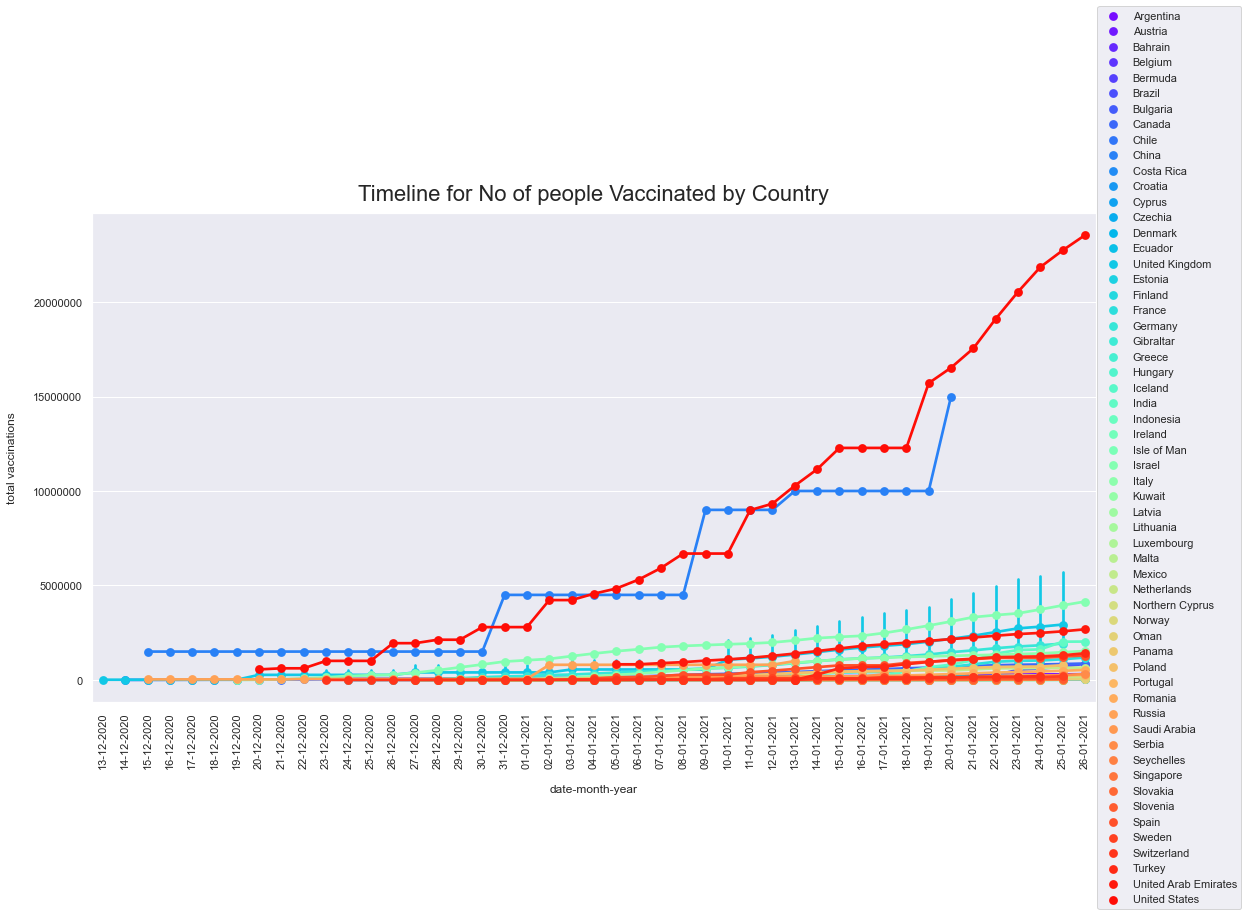

In [79]:
plt.figure(figsize=(18,9))

ax = sns.pointplot(data = covid19_vaccinations_df, 
                   x='date', 
                   y='total_vaccinations', 
                   hue='country', 
                   palette='rainbow',
                   order = pd.date_range('13-12-2020', '26-01-2021', freq='D').strftime('%d-%m-%Y') ,
                   facet_kws={"legend_out": True}                   
                  )
plt.ticklabel_format(style='plain',axis='y')
plt.title('Timeline for No of people Vaccinated by Country', fontsize=22, y=1.015)
plt.xlabel('date-month-year', labelpad=16)
plt.ylabel('total vaccinations', labelpad=16)
leg = ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.xticks(rotation=90)
#plt.setp(ax.collections, alpha=.6) #for the markers
#plt.setp(ax.lines, alpha=.3) #for the lines
plt.savefig('images/image7.png', bbox_inches='tight')
plt.show()

<a id='part4-7'></a>
### 4.7 WordCloud  

In [80]:
country_list = covid19_vaccinations_df['country'].unique()

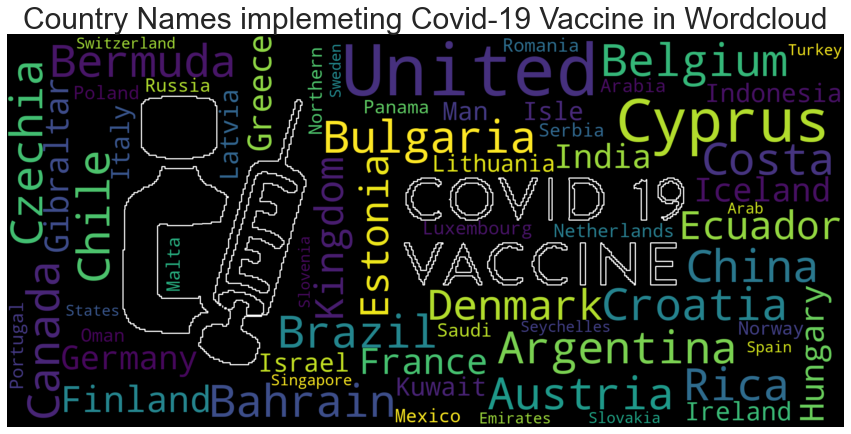

In [82]:
plt.figure(figsize=[15, 15])

image = Image.open("images/vaccine.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(country_list))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Country Names implemeting Covid-19 Vaccine in Wordcloud', fontsize=30)
plt.savefig('images/image8.png')
plt.show()